In [1]:
import pandas as pd
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read in data
clean_apple = pd.read_csv("C:/Users/Ethan/Desktop/IA 645 Project/clean_apple.csv")
clean_apple = clean_apple.drop([3804])
#clean_apple

clean_air = pd.read_csv("C:/Users/Ethan/Desktop/IA 645 Project/clean_air.csv")
clean_air

,Index,binary_value,airline_sentiment,sentiment_score,airline_sentiment_confidence,text,tokens2,Column12
0,n0,1,neutral,3,1.0000,what said,"[\'what\', \'said\']",NaN
1,n1,1,positive,5,0.3486,plus youve added commercials to the experienc...,"[\'plus\', \'youve\', \'added\', \'commercials...",NaN
2,n2,1,neutral,3,0.6837,i didnt today must mean i need to take ano...,"[\'i\', \'didnt\', \'today\', \'must\', \'mean...",NaN
3,n3,0,negative,1,1.0000,"its really aggressive to blast obnoxious ""ent...","[\'its\', \'really\', \'aggressive\', \'to\', ...",NaN
4,n4,0,negative,1,1.0000,and its a really big bad thing about it,"[\'and\', \'its\', \'a\', \'really\', \'big\',...",NaN
...,...,...,...,...,...,...,...,...
14635,n14635,1,positive,5,0.3487,thank you we got on a different flight to chi...,"[\'thank\', \'you\', \'we\', \'got\', \'on\', ...",NaN
14636,n14636,0,negative,1,1.0000,leaving over 20 minutes late flight no warni...,"[\'leaving\', \'over\', \'20\', \'minutes\', \...",NaN
14637,n14637,1,neutral,3,1.0000,please bring american airlines to blackberry10,"[\'please\', \'bring\', \'american\', \'airlin...",NaN
14638,n14638,0,negative,1,1.0000,"you have my money, you change my flight, and ...","[\'you\', \'have\', \'my\', \'money\', \'you\'...",NaN


In [2]:
from sklearn.model_selection import train_test_split
# split apple data into training and testing  
y= np.asarray(clean_apple['binary_value']) # coerce to array to make worth with .fit
x= clean_apple['text'].tolist() # coerce to type list to make work with .fit
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=31)

# get data from validation set to fit model to
y_val = np.asarray(clean_air['binary_value'])
x_val = clean_air['text'].tolist()


In [3]:
# verify that the splitting works
len(y_test)
len(y_train)

len(x_test)
len(x_train)

3043

In [4]:
### Model 1: Naive Bayes

In [5]:
# create pipeline to make naive bayes model (model 1)
# source: https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [6]:
# naive bayes on apple test data

model1.fit(x_train,y_train)
labels = model1.predict(x_test)

# naive bayes on validation data (airlines)

labels_val = model1.predict(x_val)

              precision    recall  f1-score   support

         0.0       0.90      0.56      0.69       257
         1.0       0.81      0.97      0.88       504

    accuracy                           0.83       761
   macro avg       0.85      0.77      0.79       761
weighted avg       0.84      0.83      0.82       761



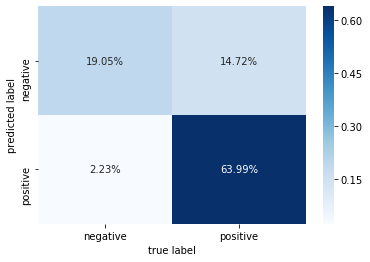

In [7]:
# get tools to report confusion_matrix and accuracy, recall, f1 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# test model performance on test data

# get confusion matrix
cm1 = confusion_matrix(y_test, labels)

# print pretty heatmap
ax1 = sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='.2%',cmap='Blues',xticklabels=['negative','positive'],yticklabels=['negative','positive'])
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label')

ax1

# print accuracy, precision, and recall report
print(classification_report(y_test,labels))



              precision    recall  f1-score   support

           0       0.84      0.37      0.52      9178
           1       0.45      0.88      0.60      5462

    accuracy                           0.56     14640
   macro avg       0.65      0.63      0.56     14640
weighted avg       0.70      0.56      0.55     14640



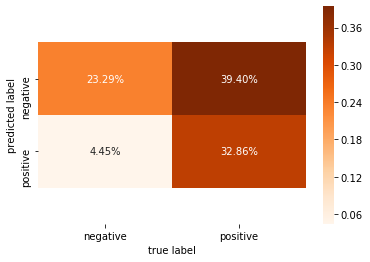

In [8]:
# test model performance on validation data

# get confusion matrix
cm2 = confusion_matrix(y_val,labels_val)

# print pretty heatmap
ax2 = sns.heatmap(cm2/np.sum(cm2), annot=True, fmt='.2%',cmap='Oranges',xticklabels=['negative','positive'],yticklabels=['negative','positive'])
bottom, top = ax1.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label')

ax2

# print accuracy, precision, and recall report
print(classification_report(y_val,labels_val))

# high recall for positives suggests that the model is decent at detecting positive tweets,

# the model thinks that a ton (5708) of positive tweets are actually negative, which could cause an organization to seriously overrate its use of a cyberattack.
# model has an issue with FALSE POSITIVES

In [9]:
# switch roles of train/test and validation datasets

# split apple data into training and testing  
y2= np.asarray(clean_air['binary_value']) # coerce to array to make worth with .fit
x2= clean_air['text'].tolist() # coerce to type list to make work with .fit
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=31)

# get data from validation set to fit model to
y2_val = np.asarray(clean_apple['binary_value'])
x2_val = clean_apple['text'].tolist()

In [10]:
# naive bayes on airline test data

model1.fit(x2_train,y2_train)
labels2 = model1.predict(x2_test)

# naive bayes on validation data (apple)

labels_val2 = model1.predict(x2_val)

              precision    recall  f1-score   support

           0       0.72      0.99      0.83      1817
           1       0.94      0.38      0.54      1111

    accuracy                           0.75      2928
   macro avg       0.83      0.68      0.68      2928
weighted avg       0.80      0.75      0.72      2928



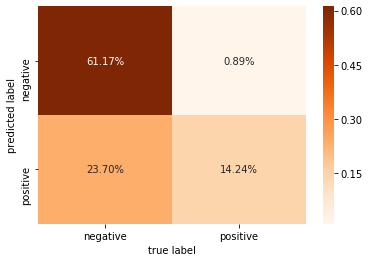

In [11]:
# get confusion matrix
cm3 = confusion_matrix(y2_test,labels2) # trained on airline, tested on airline

# print pretty heatmap
ax3 = sns.heatmap(cm3/np.sum(cm3), annot=True, fmt='.2%',cmap='Oranges',xticklabels=['negative','positive'],yticklabels=['negative','positive'])
bottom, top = ax3.get_ylim()
ax3.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label')

ax3

# print accuracy, precision, and recall report
print(classification_report(y2_test,labels2))

              precision    recall  f1-score   support

         0.0       0.41      0.90      0.56      1219
         1.0       0.89      0.39      0.54      2585

    accuracy                           0.55      3804
   macro avg       0.65      0.65      0.55      3804
weighted avg       0.74      0.55      0.55      3804



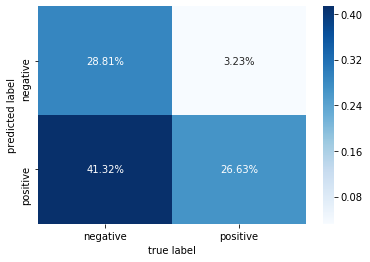

In [12]:
# get confusion matrix
cm4 = confusion_matrix(y2_val,labels_val2) # trained on airline, tested on apple

# print pretty heatmap
ax4 = sns.heatmap(cm4/np.sum(cm4), annot=True, fmt='.2%',cmap='Blues',xticklabels=['negative','positive'],yticklabels=['negative','positive'])
bottom, top = ax4.get_ylim()
ax4.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label')

ax3

# print accuracy, precision, and recall report
print(classification_report(y2_val,labels_val2))

# 55% accuracy, nearly identical. issue isn't lack of data but overfitting

C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the n

              precision    recall  f1-score   support

         0.0       0.79      0.66      0.72       257
         1.0       0.84      0.91      0.87       504

    accuracy                           0.83       761
   macro avg       0.82      0.79      0.80       761
weighted avg       0.82      0.83      0.82       761



C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


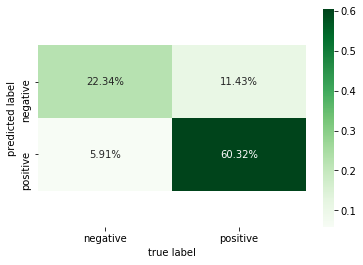

In [13]:
## Model 2 Logistic Regression

# test Model 2 on test dataset

from sklearn.linear_model import LogisticRegressionCV

model2 = make_pipeline(TfidfVectorizer(), LogisticRegressionCV())

model2.fit(x_train, y_train)
lreg_labels = model2.predict(x_test)

# get confusion matrix
cm5 = confusion_matrix(y_test,lreg_labels) # trained on apple, tested on apple

# print pretty heatmap
ax5 = sns.heatmap(cm5/np.sum(cm5), annot=True, fmt='.2%',cmap='Greens',xticklabels=['negative','positive'],yticklabels=['negative','positive'])
bottom, top = ax4.get_ylim()
ax5.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label')

print(classification_report(y_test,lreg_labels))
# 83.3% accurate

C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the n

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      9178
           1       0.92      0.86      0.89      5462

    accuracy                           0.92     14640
   macro avg       0.92      0.91      0.91     14640
weighted avg       0.92      0.92      0.92     14640



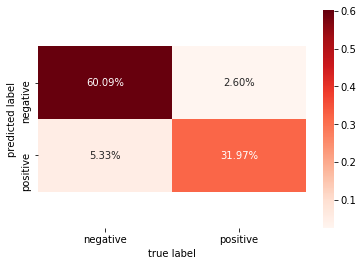

In [14]:
# test Model 2 on validation dataset

model2 = make_pipeline(TfidfVectorizer(), LogisticRegressionCV())

model2.fit(x_val, y_val)
lreg_labels_val = model2.predict(x_val)

# get confusion matrix
cm6 = confusion_matrix(y_val,lreg_labels_val) # trained on apple, tested on airline

# print pretty heatmap
ax6 = sns.heatmap(cm6/np.sum(cm6), annot=True, fmt='.2%',cmap='Reds',xticklabels=['negative','positive'],yticklabels=['negative','positive'])
bottom, top = ax4.get_ylim()
ax6.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label')

ax6

print(classification_report(y_val,lreg_labels_val))

C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the n

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1817
           1       0.84      0.73      0.78      1111

    accuracy                           0.84      2928
   macro avg       0.84      0.82      0.83      2928
weighted avg       0.84      0.84      0.84      2928



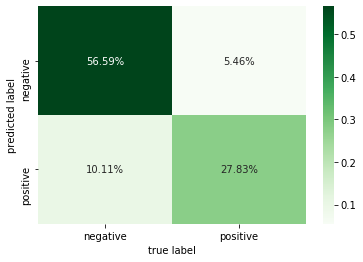

In [15]:
# switch test and validation

# logistic regression on airline test data

model2.fit(x2_train,y2_train) # trained on airline, tested on airline
lreg_labels2 = model2.predict(x2_test)

# get confusion matrix
cm7 = confusion_matrix(y2_test,lreg_labels2) # trained on apple, tested on airline

# print pretty heatmap
ax7 = sns.heatmap(cm7/np.sum(cm7), annot=True, fmt='.2%',cmap='Greens',xticklabels=['negative','positive'],yticklabels=['negative','positive'])
bottom, top = ax7.get_ylim()
ax7.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label')

ax7

# get accuracy, precision, recall
print(classification_report(y2_test,lreg_labels2))

              precision    recall  f1-score   support

         0.0       0.50      0.74      0.60      1219
         1.0       0.84      0.65      0.73      2585

    accuracy                           0.68      3804
   macro avg       0.67      0.70      0.67      3804
weighted avg       0.73      0.68      0.69      3804



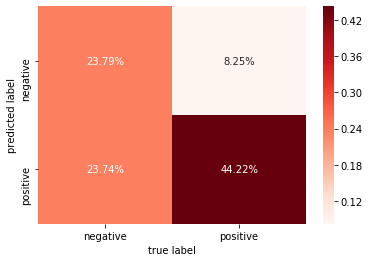

In [16]:

# logistic regression on validation data (apple)

lreg_labels_val2 = model2.predict(x2_val) # trained on airline, tested on apple

# get confusion matrix
cm8 = confusion_matrix(y2_val,lreg_labels_val2) # trained on apple, tested on airline

# print pretty heatmap
ax8 = sns.heatmap(cm8/np.sum(cm8), annot=True, fmt='.2%',cmap='Reds',xticklabels=['negative','positive'],yticklabels=['negative','positive'])
bottom, top = ax8.get_ylim()
ax8.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label')

ax8

# get accuracy, precision, recall
print(classification_report(y2_val,lreg_labels_val2))
